In [2]:
import os ; import sys
sys.path.append(os.getcwd()+"/../../src")
import qtcipy
from qtcipy.tbscftk import hamiltonians
from qtcipy import interpolate
from scipy.sparse import coo_matrix
from scipy.sparse import diags
import numpy as np
%matplotlib widget
import importlib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [53]:
importlib.reload(qtcipy.tbscftk)
from qtcipy.tbscftk import hamiltonians
R=9
Htest= hamiltonians.chain(R)
Lsys=2**R
#H = hamiltonians.honeycomb(5, periodic=True)

In [54]:
def potential(Vb,x,ky=0,alpha=0.0027,L=1024,V0=-0.35,dis=0):
    x0 = np.sqrt(np.abs(V0 - Vb)) * np.sqrt(1/alpha)
    if x < -L/2:
        return V0+(np.random.rand()-0.5)*dis
    elif -L/2 <= x < -L/2 + x0:
        return Vb + np.sign(V0 - Vb) * alpha * (x + L/2 - x0)**2 +(np.random.rand()-0.5)*dis
    else:
        return Vb+(np.random.rand()-0.5)*dis

In [126]:
Hcoo=coo_matrix(Htest.H.copy())
Hcoo.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [58]:
#ftest=lambda x: 1*np.exp(1j*2*np.pi*0.001*x[0])

def onsite(x):
    return np.cos(2*np.pi*0.03*x[0])+potential(0.1,x[0],alpha=0.000027,L=Lsys,V0=-0.35)
Htest.add_onsite(onsite)
Hcoo=coo_matrix(Htest.H.copy())

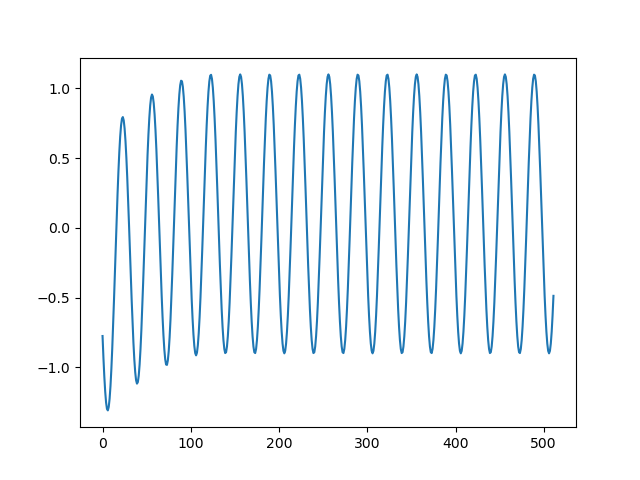

In [59]:
plt.figure()
plt.plot([onsite(xx) for xx in np.transpose(np.array([range(int(-Lsys/2),int(Lsys/2),1),np.ones(Lsys)]))])
plt.show()

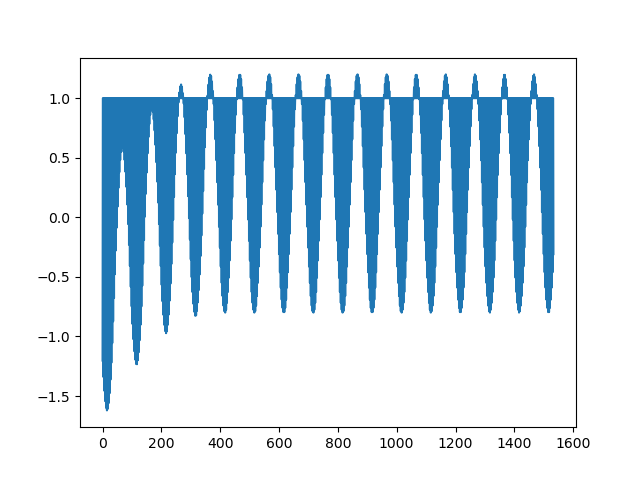

In [60]:
plt.figure()
plt.plot(np.real(Hcoo.data))
plt.show()

In [61]:
SCF=Htest.get_SCF_Hubbard(U=0.5)

In [62]:
SCF.solve(use_qtci=True, use_kpm=True, chiral_AF=True)

SCF Initialization DONE


In [65]:
data=[]
for ii in tqdm(range(200)):
    (energies,dos) = SCF.get_dos(i=ii,delta=1e-2,w=np.linspace(-1,1,1000))
    data.append(dos)
    

100%|██████████| 200/200 [04:42<00:00,  1.41s/it]


In [67]:
np.array(data).shape

(200, 1000)

In [75]:
np.max(data)

22.538775310245725

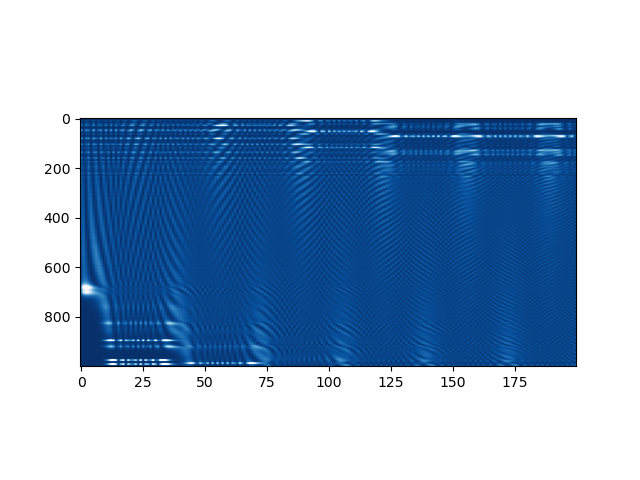

In [68]:
plt.figure()
plt.imshow(np.transpose(np.array(data)),aspect=1/10,vmax=4,cmap='Blues_r')
plt.show()

In [112]:
energies[1]

-4.98998998998999

In [ ]:
import

In [36]:
R=7
Lsys=2**R
Vb=0.1
phi=0.05
alpha=0.00007
def obtaindos(ky):
    Hky= hamiltonians.chain(R)
    def onsite(x):
        return 2*np.cos(2*np.pi*phi*x[0])+potential(Vb,x[0],alpha=alpha,ky=ky,L=Lsys,V0=-0.35)
    Hky.add_onsite(onsite)
    SCF=Hky.get_SCF_Hubbard(U=1)
    SCF.solve(use_qtci=True, use_kpm=True, chiral_AF=True)
    data=[]
    for ii in tqdm(range(Lsys)):
        (_,dos) = SCF.get_dos(i=ii,delta=1e-2)
        data.append(dos)
    return data
    

In [37]:
from joblib import Parallel, delayed

In [38]:
dataall=Parallel(n_jobs=5)(delayed(obtaindos)(ky) for ky in np.linspace(0,2*np.pi,5))

Recalling QTCI optimization with lower threshold 0.01
Recalling QTCI optimization with lower threshold 0.01
Recalling QTCI optimization with lower threshold 0.01
Recalling QTCI optimization with lower threshold 0.013000000000000001
SCF Initialization DONE
SCF Initialization DONE
SCF Initialization DONE
SCF Initialization DONE
SCF Initialization DONE


100%|██████████| 128/128 [04:15<00:00,  2.00s/it]


In [40]:
np.sum(dataall,axis=0)

array([[-1.65303263e-05, -1.65303263e-05, -1.65303263e-05, ...,
        -1.91587871e-05, -1.91587871e-05, -1.91587871e-05],
       [ 6.33375431e-06,  6.33375431e-06,  6.33375431e-06, ...,
        -5.69558200e-06, -5.69558200e-06, -5.69558200e-06],
       [-2.18017162e-05, -2.18017162e-05, -2.18017162e-05, ...,
        -1.28393820e-05, -1.28393820e-05, -1.28393820e-05],
       ...,
       [-3.92825660e-06, -3.92825660e-06, -3.92825660e-06, ...,
        -4.04303942e-05, -4.04303942e-05, -4.04303942e-05],
       [-4.80830066e-06, -4.80830066e-06, -4.80830066e-06, ...,
         3.23471947e-06,  3.23471947e-06,  3.23471947e-06],
       [-5.17199891e-07, -5.17199891e-07, -5.17199891e-07, ...,
        -5.32149728e-06, -5.32149728e-06, -5.32149728e-06]])

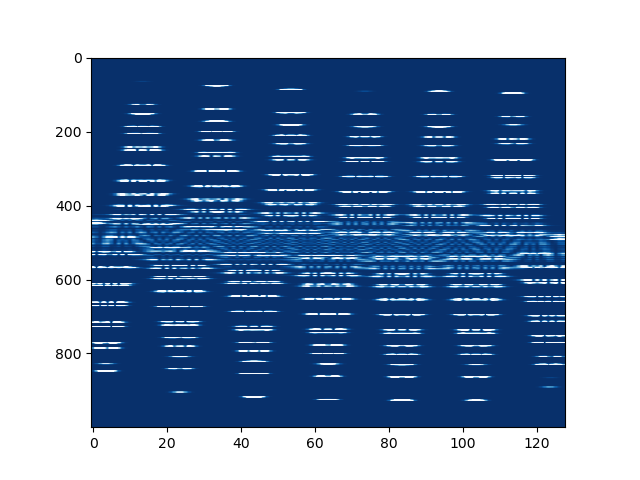

In [44]:
plt.figure()
plt.imshow(np.transpose(np.array(np.sum(dataall,axis=0))),aspect=1/10,vmax=10,cmap='Blues_r')
plt.show()

# Graphene 2D

In [17]:
import os ; import sys
sys.path.append(os.getcwd()+"/../../src")
import qtcipy
from qtcipy.tbscftk import hamiltonians
from qtcipy import interpolate
from scipy.sparse import coo_matrix
from scipy.sparse import diags
import numpy as np
%matplotlib widget
import importlib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [18]:
#importlib.reload(qtcipy.tbscftk.hamiltonians)
from qtcipy.tbscftk import hamiltonians
H = hamiltonians.honeycomb(4, periodic=False)

In [3]:
H = hamiltonians.honeycomb_mag(3,0.01, periodic=False)

In [19]:
def potential(Vb,x,alpha=0.0027,L=20,V0=-0.35,dis=0):
    x0 = np.sqrt(np.abs(V0 - Vb)) * np.sqrt(1/alpha)
    if x < L:
        return V0+(np.random.rand()-0.5)*dis
    elif L <= x < L + x0:
        return Vb + np.sign(V0 - Vb) * alpha * (x - L - x0)**2 +(np.random.rand()-0.5)*dis
    else:
        return Vb+(np.random.rand()-0.5)*dis
def onsite(x):
    return potential(0.1,np.sqrt(x[0]**2+x[1]**2),alpha=0.0007,L=10,V0=-0.35)
H.add_onsite(onsite)

In [6]:
Hcoo=coo_matrix(H.H.copy())
np.diag(Hcoo.toarray())

array([-0.34999999+0.j, -0.34999999+0.j, -0.34999999+0.j, ...,
       -0.34999999+0.j, -0.34999999+0.j, -0.34999999+0.j])

In [20]:
SCF=H.get_SCF_Hubbard(U=1)

In [21]:
SCF.solve(use_qtci=True, use_kpm=True, chiral_AF=True,info=True)

SCF Initialization DONE
Starting SCF loop
SCF Error 1.0003316 iteration 1
Average magnetization 0.18797536
Max magnetization 0.42479515
Dynamical update of the QTCI
Starting SCF loop
SCF Error 0.50038147 iteration 2
Average magnetization 0.13788949
Max magnetization 0.4224715
Dynamical update of the QTCI
Starting SCF loop
SCF Error 0.25034994 iteration 3
Average magnetization 0.099939324
Max magnetization 0.42178714
Dynamical update of the QTCI
Starting SCF loop
SCF Error 0.14132403 iteration 4
Average magnetization 0.07282993
Max magnetization 0.42216635
Dynamical update of the QTCI
Starting SCF loop
SCF Error 0.089735344 iteration 5
Average magnetization 0.054609187
Max magnetization 0.43058565
Dynamical update of the QTCI
Starting SCF loop
SCF Error 0.058022697 iteration 6
Average magnetization 0.04298217
Max magnetization 0.43425536
Dynamical update of the QTCI
Starting SCF loop
SCF Error 0.03795167 iteration 7
Average magnetization 0.036279343
Max magnetization 0.43543887
Dynamica

In [25]:
datados=[]
for i in tqdm(range(0,len(H.R),1)):
    (_,dos) = SCF.get_dos(delta=1e-2,w=np.linspace(-1,1,100))
    datados.append(dos)

100%|██████████| 1024/1024 [30:26<00:00,  1.78s/it] 


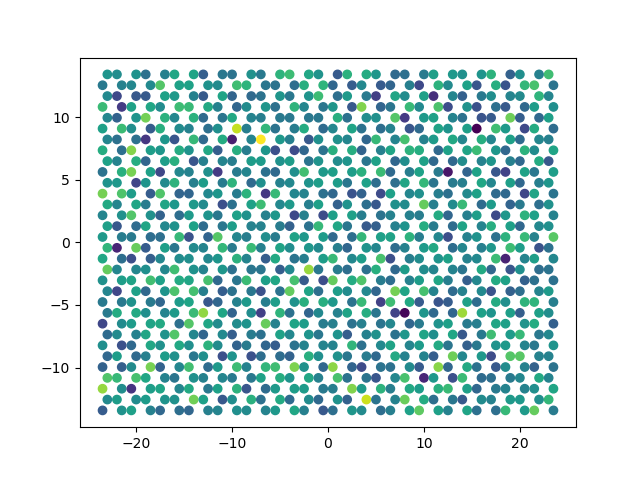

In [34]:
plt.figure()
plt.scatter(H.R[:,0],H.R[:,1],c=np.sum(np.array(datados),axis=1))
plt.show()

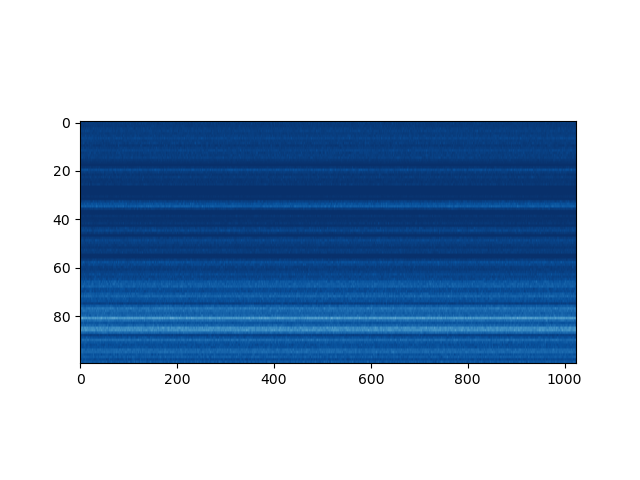

In [31]:
plt.figure()
plt.imshow(np.transpose(np.array(datados)),aspect=5,vmax=3,cmap='Blues_r')
plt.show()

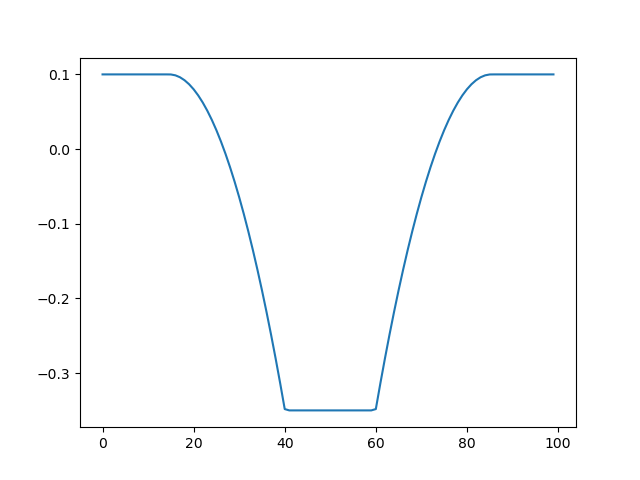

In [38]:
plt.figure()
plt.plot([potential(0.1,np.sqrt(xx[0]**2+xx[1]**2),L=10,alpha=0.0007) for xx in np.transpose(np.array([range(-50,50,1),np.ones(100)]))])
plt.show()

In [51]:
def onsite(x):
    return potential(0.1,np.sqrt(x[0]**2+x[1]**2),alpha=0.000027,L=100,V0=-0.35)
H.add_onsite(onsite)